# Insurance Database

## Configuration:
### Install Packages:

Ensure you have the libraries `ipython-sql` and `mysqlclient` installed in order to connect to the MySQL database.  Install these packages by uncommenting the code cell below:

In [1]:
# !pip install ipython-sql
# !pip install mysqlclient

This Jupyter Notebook also requires the libraries `pandas` and `matplotlib` for importing and visualizing data.  Install these packages by uncommenting the code cell below:

In [2]:
# !pip install pandas
# !pip install matplotlib

### Connect to SQL Database:

Now we can make our SQL connnection, first load the extension:

In [3]:
#load sql extension to make connection to database.
%load_ext sql

Finally, connect to the SQL database using the appropriate connection string.  **Make sure to replace `<username>`, `<password>`, `<localhost>` and `<dataBase>` with the correct login information for your database.** *If the cell below throws an error, uncomment the first cell to re-install `mysqlclient`*

In [47]:
#set a connection string to connect to the database.
#%sql mysql+mysqldb://<username>:<password>@<localhost>/<database>

## Import SQL tables using `pandas`:

Our table names are:
- `claim_fact`
- `dim_date`
- `dim_member`
- `dim_member_condition`
- `dim_place_of_service`
- `dim_procedure`
- `dim_provider`
- `dim_provider_specialty`
- `dim_provider_category`

Use `%%sql` at the start of a cell to do SQL queries.  Do not add any comments within the cell, or an error will be thrown.  Limit the number of queries.  Instead, import the data into Python as a `pandas` DataFrame to avoid hitting the hourly query limit.

In [ ]:
%%sql

SELECT *
FROM claim_fact;

In [9]:
#assign the most recent query to a ResultSet object using the underscore
result_claims = _
type(result_claims)

sql.run.ResultSet

In [11]:
#convert ResultSet to a dataframe to analyze in pandas
claims = result_claims.DataFrame()
claims.head()

,IDNO,ClaimID,ClaimLineNum,ClaimStatusCd,ClaimType,MemberID,ProviderID,posID,ServiceDate,LoadDate,Code_Type,Code_Value,AllowedCharges,PaidClaims,MemberPaid
0,1,1,1,A,P,251,1348,4,18-Jan-2019,02-Mar-2019,HCPC,D9222,225.00,0.00,225.00
1,2,1,2,A,P,251,1348,4,18-Jan-2019,02-Mar-2019,HCPC,D9223,413.00,0.00,413.00
2,3,2,2,A,P,251,1348,4,18-Jan-2019,02-Mar-2019,HCPC,D7230,275.00,0.00,275.00
3,4,2,3,A,P,251,1348,4,18-Jan-2019,02-Mar-2019,HCPC,D7230,275.00,37.00,238.00
4,5,2,4,A,P,251,1348,4,18-Jan-2019,02-Mar-2019,HCPC,D7230,275.00,37.00,238.00


In [ ]:
%%sql

SELECT * 
FROM dim_member;

In [15]:
result_members = _
members = result_members.DataFrame()

In [19]:
members.head()

,IDNO,memberID,Gender,dateOfBirth,firstname,lastname,member_street,member_city,member_County,member_state,member_zip,Product,Client_ID,StartDate,EndDate
0,1,1,M,20-Jan-1959,Liam,Aaron,1060 Blackjack Pine Street,Bulk Mail Center,Allegheny,PA,15095,PPO,A00124,01-Apr-2018,31-Dec-2020
1,2,2,M,24-Aug-1970,Noah,Archer,2383 Blister Fir Street,Warrendale,Allegheny,PA,15095,HMO,A00123,01-Sep-2021,30-Sep-2021
2,3,2,M,24-Aug-1970,Noah,Archer,2383 Blister Fir Street,Warrendale,Allegheny,PA,15095,HMO,A00123,01-Apr-2018,31-Jul-2021
3,4,3,M,01-Apr-1957,Elijah,Beck,1230 Bracted Balsam Fir Street,Bethel Park,Allegheny,PA,15102,PPO,A00124,01-Apr-2018,31-Jul-2018
4,5,4,M,27-Jun-1986,Lucas,Blixt,1755 Bristlecone Fir Street,Braddock,Allegheny,PA,15104,PPO,A00124,01-Apr-2018,31-Dec-2020


## Analysis and Visualizations:

In [27]:
#convert columns
import pandas as pd

claims['ServiceDate'] = pd.to_datetime(claims['ServiceDate'])
claims['LoadDate'] = pd.to_datetime(claims['LoadDate'])
claims['AllowedCharges'] = pd.to_numeric(claims['AllowedCharges'])
claims['PaidClaims'] = pd.to_numeric(claims['PaidClaims'])
claims['MemberPaid'] = pd.to_numeric(claims['MemberPaid'])

claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45423 entries, 0 to 45422
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   IDNO            45423 non-null  int64         
 1   ClaimID         45423 non-null  int64         
 2   ClaimLineNum    45423 non-null  int64         
 3   ClaimStatusCd   45423 non-null  object        
 4   ClaimType       45423 non-null  object        
 5   MemberID        45423 non-null  int64         
 6   ProviderID      45423 non-null  int64         
 7   posID           45423 non-null  int64         
 8   ServiceDate     45423 non-null  datetime64[ns]
 9   LoadDate        45423 non-null  datetime64[ns]
 10  Code_Type       45423 non-null  object        
 11  Code_Value      45423 non-null  object        
 12  AllowedCharges  45423 non-null  float64       
 13  PaidClaims      45423 non-null  float64       
 14  MemberPaid      45423 non-null  float64       
dtypes:

In [30]:
#convert members columns to date
members['dateOfBirth'] = pd.to_datetime(members['dateOfBirth'])
members['StartDate'] = pd.to_datetime(members['StartDate'])
members['EndDate'] = pd.to_datetime(members['EndDate'])
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IDNO           840 non-null    int64         
 1   memberID       840 non-null    int64         
 2   Gender         840 non-null    object        
 3   dateOfBirth    840 non-null    datetime64[ns]
 4   firstname      840 non-null    object        
 5   lastname       840 non-null    object        
 6   member_street  840 non-null    object        
 7   member_city    840 non-null    object        
 8   member_County  840 non-null    object        
 9   member_state   840 non-null    object        
 10  member_zip     840 non-null    object        
 11  Product        840 non-null    object        
 12  Client_ID      840 non-null    object        
 13  StartDate      840 non-null    datetime64[ns]
 14  EndDate        840 non-null    datetime64[ns]
dtypes: datetime64[ns](3), i

In [34]:
#get number of males v females
member_sex_counts = members["Gender"].value_counts()
print(member_sex_counts, "\n")

#get proportions of males v females
member_sex_props = members["Gender"].value_counts(normalize=True)
print(member_sex_props)

M    498
F    342
Name: Gender, dtype: int64 

M    0.592857
F    0.407143
Name: Gender, dtype: float64


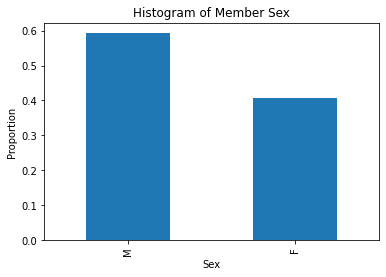

In [41]:
#plot data in matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

member_sex_props.plot(kind="bar")

ax.set_xlabel("Sex")
ax.set_ylabel("Proportion")
ax.set_title("Histogram of Member Sex")
plt.show()

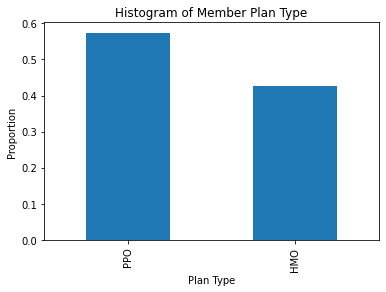

In [46]:
fig, ax = plt.subplots()

members_type_of_policy = members["Product"].value_counts(normalize=True)
members_type_of_policy.plot(kind="bar")

ax.set_xlabel("Plan Type")
ax.set_ylabel("Proportion")
ax.set_title("Histogram of Member Plan Type")

plt.show()